### Student Information
Name: 徐子桓

Student ID: 110062590

GitHub ID: ricky42613

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

# Take Home

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [6]:
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [7]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [8]:
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
X[::10][0:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,3,soc.religion.christian
20,From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...,3,soc.religion.christian
30,From: vgwlu@dunsell.calgary.chevron.com (greg ...,2,sci.med
40,From: david-s@hsr.no (David A. Sjoen) Subject:...,3,soc.religion.christian
50,From: ab@nova.cc.purdue.edu (Allen B) Subject:...,1,comp.graphics
60,From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...,0,alt.atheism
70,From: weaver@chdasic.sps.mot.com (Dave Weaver)...,3,soc.religion.christian
80,From: annick@cortex.physiol.su.oz.au (Annick A...,2,sci.med
90,Subject: Vonnegut/atheism From: dmn@kepler.unh...,0,alt.atheism


## take home exercise #2

In [14]:
print('select column')
print(X[['text','category']])
print('select record where category_name equal to specific value')
print(X.loc[X['category_name'] == 'soc.religion.christian'])

select column
                                                   text  category
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3
...                                                 ...       ...
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2

[2257 rows x 2 columns]
select record where category_name equal to specific value
                                                   text  category  \
2     From: djohnson@cs.ucsd.edu (Darin Jo

## take home exercies 5

In [17]:

import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [18]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

isnull function didn't work because the type of 'None' 'NaN' '' are str that is not real None

## take home exercise 6

In [23]:

X_sample = X.sample(n=1000)
X_sample[0:4]

,text,category,category_name
885,Organization: University of Illinois at Chicag...,2,sci.med
1099,From: george@ccmail.larc.nasa.gov (George M. B...,1,comp.graphics
736,From: JEK@cu.nih.gov Subject: Watt misquoted L...,3,soc.religion.christian
142,From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...,2,sci.med


In [24]:
X[0:4]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian


X_sample which generated by sample() has different order with original X
and the length of X_sample is equal to the parameter n we set

## take home exercise 8

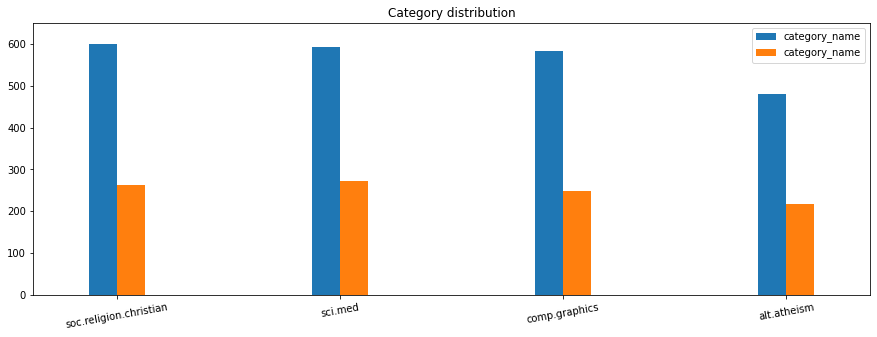

In [25]:
result_combined_df = pd.concat([X.category_name.value_counts(),
                                X_sample.category_name.value_counts()], axis=1) \
                        .plot(kind = 'bar',title = 'Category distribution', \
                            ylim = [0, 650], width = 0.25,rot = 10, \
                            fontsize = 10, figsize = (15,5))

## take home exercise 10

In [31]:

import nltk
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
# use where() to get all the positions that value 1 occurs in document 4
tmp = np.where(X_counts[4:5, 0:100].toarray() == 1)
# the second 1 represent what feature
count_vect.get_feature_names()[tmp[1][1]:tmp[1][1]+1]


['01']

## take home exercise 11

/Users/zihuanxu/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


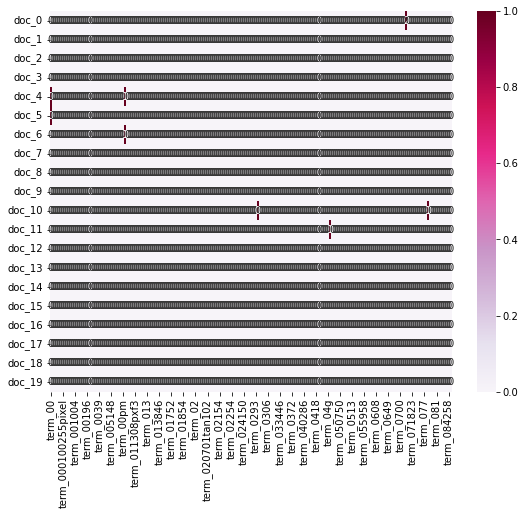

In [33]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:200]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:200].toarray()

import seaborn as sns
import matplotlib.pyplot as plt

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

## take home exercise 12

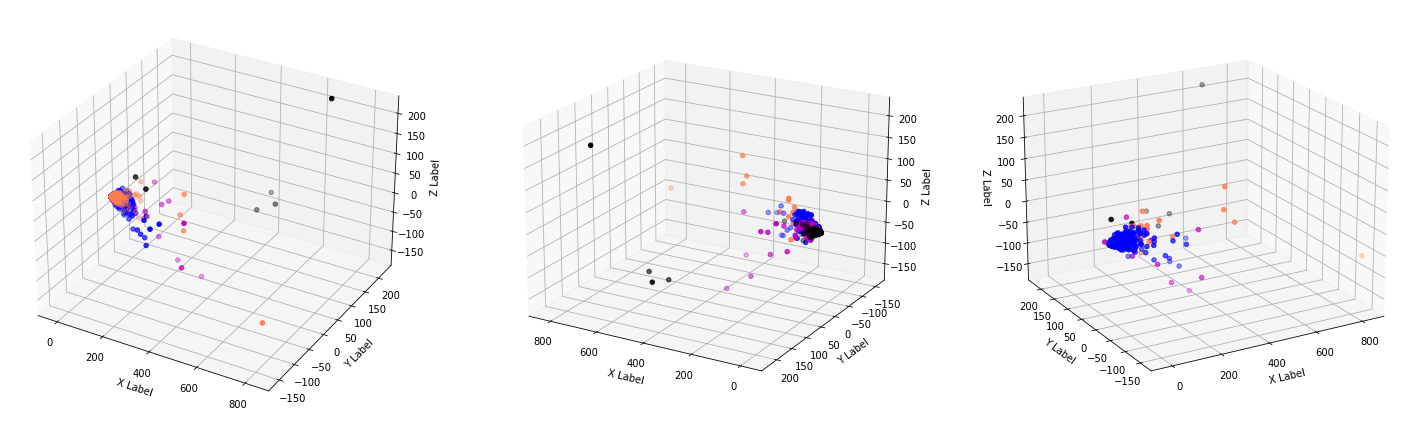

In [34]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'm']

fig = plt.figure(figsize = (25,10))
# set each subplot's position
ax = fig.add_subplot(1, 3, 1, projection='3d')
ay = fig.add_subplot(1, 3, 2, projection='3d')
az = fig.add_subplot(1, 3, 3, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    # show in different angle
    ax.scatter(xs, ys, zs, c = c, marker='o')
    ay.scatter(xs, ys, zs, c = c, marker='o')
    az.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ay.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ay.set_xlabel('X Label')
ay.set_ylabel('Y Label')
ay.set_zlabel('Z Label')
az.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
az.set_xlabel('X Label')
az.set_ylabel('Y Label')
az.set_zlabel('Z Label')
# set the view angle
ay.view_init(elev=20., azim=120)
az.view_init(elev=20., azim=240)
plt.show()


## take home exercies 13

In [ ]:
import plotly.express as px

term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
    
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

fig = px.bar(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
fig.show()

## take home exercise 14

/Users/zihuanxu/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



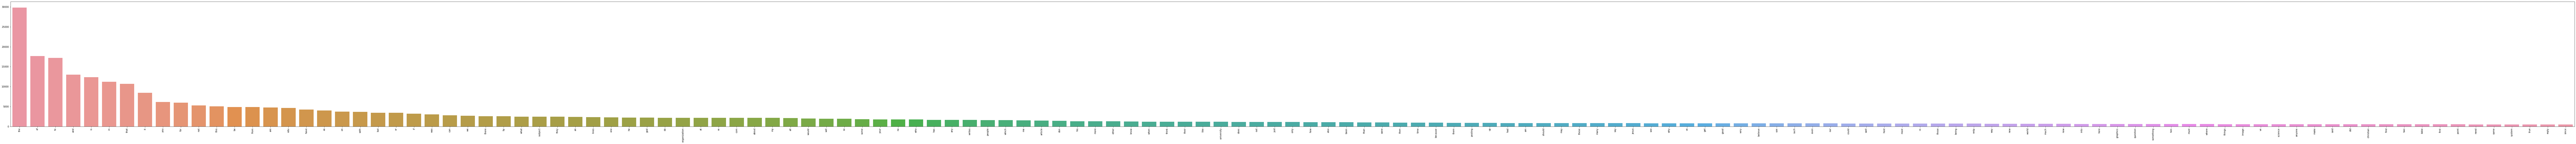

In [39]:
# zip the frequencies and features to make sure it still matches to the right feature after sort
z = zip(term_frequencies, count_vect.get_feature_names())
res = sorted(z, key = lambda x: x[0], reverse=True)
freq, feat = zip(*res)
freq = list(freq)
feat = list(feat)
totalLen = 0
# focus on features that frequencies are > 500
for i in range(len(freq)):
    if freq[i] < 500:
        totalLen = i
        break
plt.subplots(figsize=(200, 10))
g = sns.barplot(x = feat[:totalLen],y = freq[:totalLen])
g.set_xticklabels(feat[:totalLen], rotation = 90);

## take home exercise 15

/Users/zihuanxu/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



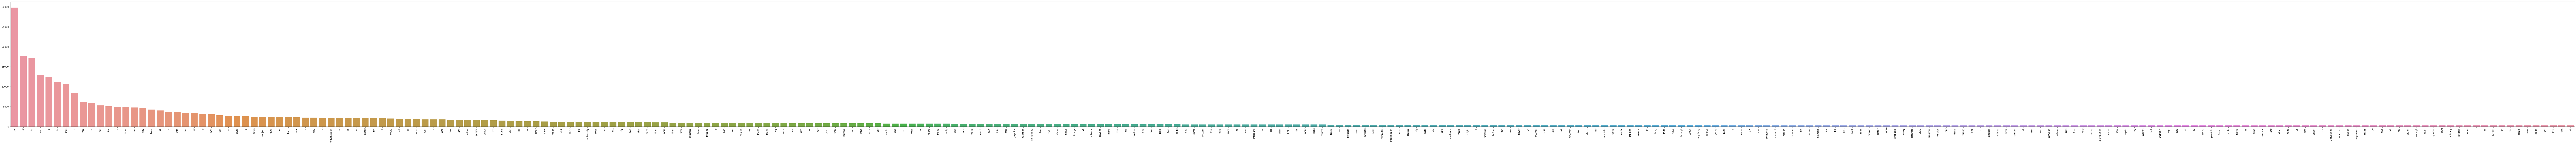

In [41]:
z = zip(term_frequencies, count_vect.get_feature_names())
res = sorted(z, key = lambda x: x[0], reverse=True)
freq, feat = zip(*res)
freq = list(freq)
feat = list(feat)
plt.subplots(figsize=(200, 10))
g = sns.barplot(x = feat[:300],y = freq[:300])
g.set_xticklabels(feat[:300], rotation = 90);

## take home exercise 16

In [44]:

from sklearn import preprocessing
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['cate_bin'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,unigrams,bin_category,cate_bin
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]","[0, 0, 1, 0]"


# All the steps for the new dataset

## read dataset

In [71]:
subdf1 = pd.read_csv('dataset/amazon_cells_labelled.txt', sep='\t', header=None, names = ['Review','Score','Category','Category_Name'])
subdf2 = pd.read_csv('dataset/imdb_labelled.txt', sep='\t', header=None, names = ['Review','Score','Category','Category_Name'])
subdf3 = pd.read_csv('dataset/yelp_labelled.txt', sep='\t', header=None, names = ['Review','Score','Category','Category_Name'])

df = [subdf1,subdf2,subdf3] #    1 for amazon, 2 for IMDB, 3 for Yelp
category_name =  ['Amazon','IMDB', 'Yelp']

for d,i,c in zip (df,range(1,4),category_name):
    d['Category'] = i
    d['Category_Name'] = c

df = pd.concat(df, ignore_index=True)
df

,Review,Score,Category,Category_Name
0,So there is no way for me to plug it in here i...,0,1,Amazon
1,"Good case, Excellent value.",1,1,Amazon
2,Great for the jawbone.,1,1,Amazon
3,Tied to charger for conversations lasting more...,0,1,Amazon
4,The mic is great.,1,1,Amazon
...,...,...,...,...
2743,I think food should have flavor and texture an...,0,3,Yelp
2744,Appetite instantly gone.,0,3,Yelp
2745,Overall I was not impressed and would not go b...,0,3,Yelp
2746,"The whole experience was underwhelming, and I ...",0,3,Yelp


## miss value

In [72]:
import helpers.data_mining_helpers as dmh
print('length of df : ',len(df))
print(df.isnull().apply(lambda x: dmh.check_missing_values(x)))

dummy_rec = [{'Review': 'dummy record','Score': 0,'Category': 2}]
df = df.append(dummy_rec, ignore_index = True)
print('length after add',len(df))
print(df.isnull().apply(lambda x: dmh.check_missing_values(x)))
df.dropna(inplace = True)
print('length after drop none',len(df))
print(df.isnull().apply(lambda x: dmh.check_missing_values(x)))


length of df :  2748
                               Review                               Score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                             Category                       Category_Name  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   0                                   0  
length after add 2749
                               Review                               Score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                             Category                       Category_Name  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   0                                   1  
length after drop none 2748
         

## Duplicate Data

In [73]:
print(df.duplicated())
print('Duplicate number:', sum(df.duplicated()))
print('Duplicate number of Review : ', sum(df.duplicated(subset=['Review'])))
print('Duplicate number of score : ', sum(df.duplicated(subset=['Score'])))
print('Original length of df', len(df))
df.drop_duplicates(keep="first", inplace=True)
print('after remove duplicate length of df',len(df))

0       False
1       False
2       False
3       False
4       False
        ...  
2743    False
2744    False
2745    False
2746    False
2747    False
Length: 2748, dtype: bool
Duplicate number: 17
Duplicate number of Review :  17
Duplicate number of score :  2746
Original length of df 2748
after remove duplicate length of df 2731


## Data Preprocessing



Score count of X:
 1    1376
0    1355
Name: Score, dtype: int64


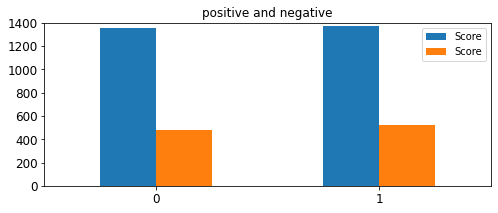

In [77]:
df_sample = df.sample(n=1000) 

import matplotlib.pyplot as plt
%matplotlib inline

print('\n\nScore count of X:\n', df.Score.value_counts())
result_combined_df = pd.concat([df.Score.value_counts(),
                                df_sample.Score.value_counts()], axis=1) \
                        .plot(kind = 'bar', title = 'positive and negative', \
                                ylim = [0, 1400], rot = 0, \
                                fontsize = 12, figsize = (8,3))

## feature

In [78]:

import nltk
# obtain unigrams for each text
df['unigrams'] = df['Review'].apply(lambda x: dmh.tokenize_text(x))
X[0:4]["unigrams"]

0    [From, :, sd345, @, city.ac.uk, (, Michael, Co...
1    [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....
2    [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...
3    [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...
Name: unigrams, dtype: object

Unigrams of Hello World! ['hello', 'world']
Unigrams of first sentence: ['so', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it', 'in', 'here', 'in', 'the', 'us', 'unless', 'go', 'by', 'converter']
(2731, 5155)
['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0

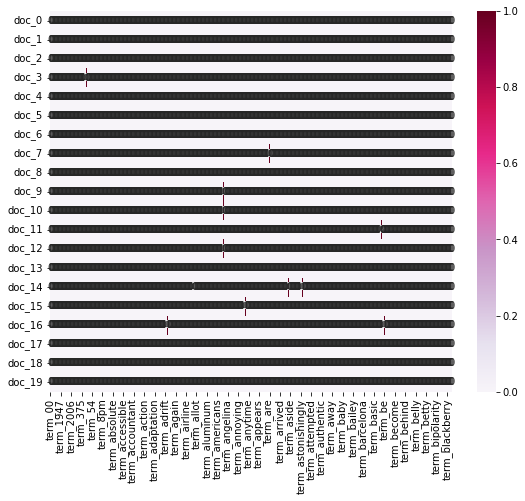

In [88]:

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.Review)
analyze = count_vect.build_analyzer()
print('Unigrams of Hello World!', analyze("Hello World!"))
print('Unigrams of first sentence:', analyze(" ".join(list(df[:1].Review))))
print(df_counts.shape)
print(count_vect.get_feature_names()[0:10])
print(df_counts[0:5, 0:100].toarray())

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:500]]
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]
plot_z = df_counts[0:20, 0:500].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

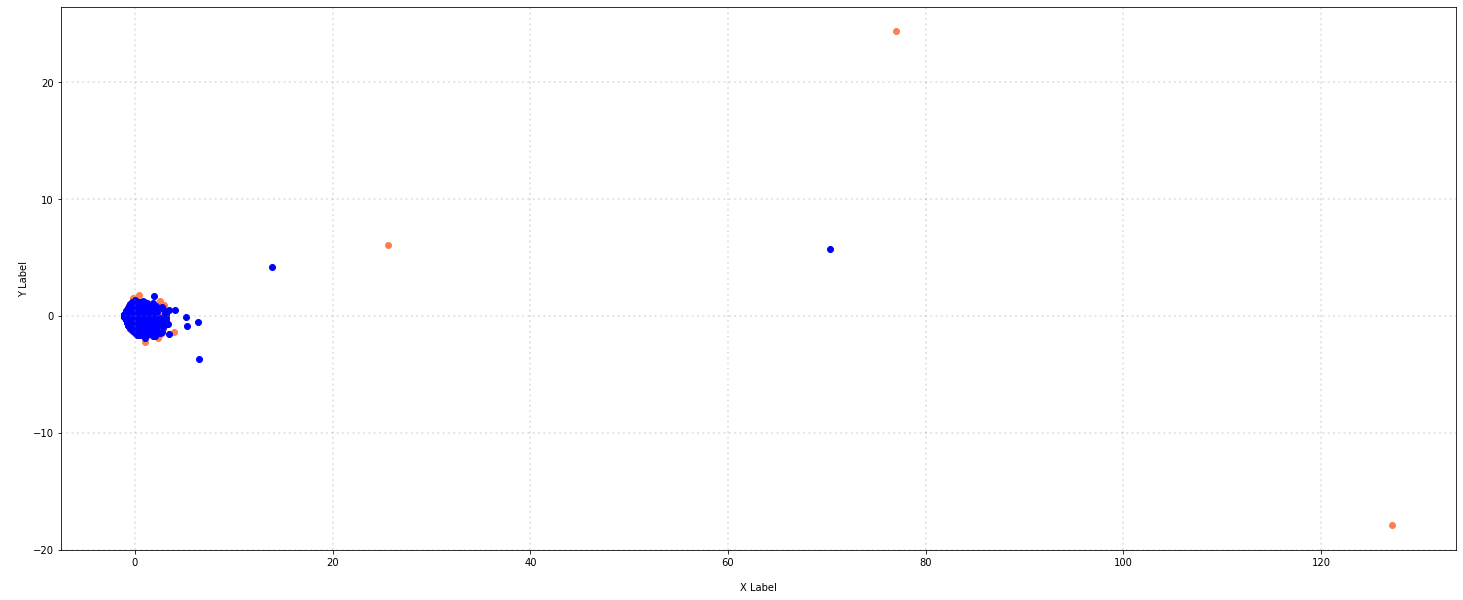

In [91]:
from sklearn.decomposition import PCA
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())
col = ['coral', 'blue']
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, s in zip(col, [0,1]):
    xs = df_reduced[df['Score'] == s].T[0]
    ys = df_reduced[df['Score'] == s].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

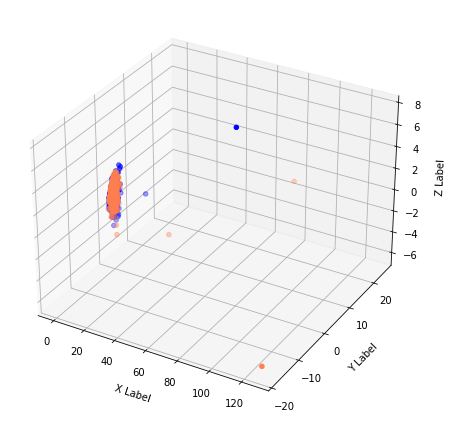

In [99]:
from mpl_toolkits.mplot3d import Axes3D
df_reduced = PCA(n_components = 3).fit_transform(df_counts.toarray())
col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(1, 3, 1, projection='3d')

for c, s in zip(col, [0, 1]):
    xs = df_reduced[df['Score'] == s].T[0]
    ys = df_reduced[df['Score'] == s].T[1]
    zs = df_reduced[df['Score'] == s].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

/Users/zihuanxu/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/Users/zihuanxu/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



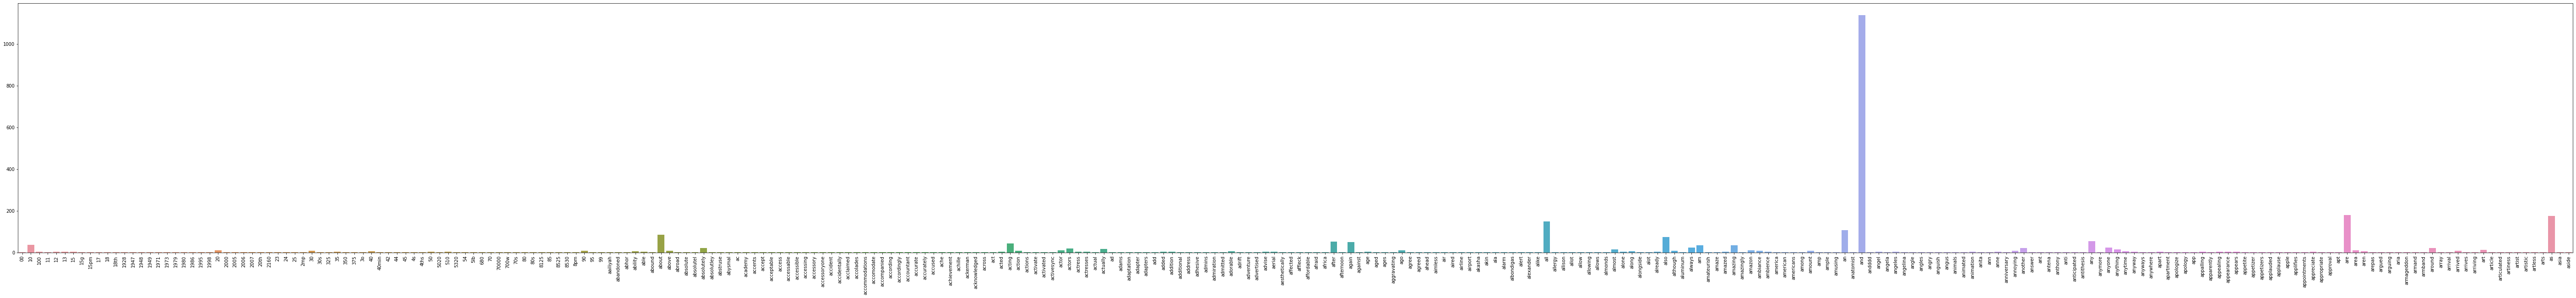

In [100]:

# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [ ]:
# We can use plotly to have a nicer interactive visualizarion
import plotly.express as px
fig = px.bar(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
fig.show()

/Users/zihuanxu/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



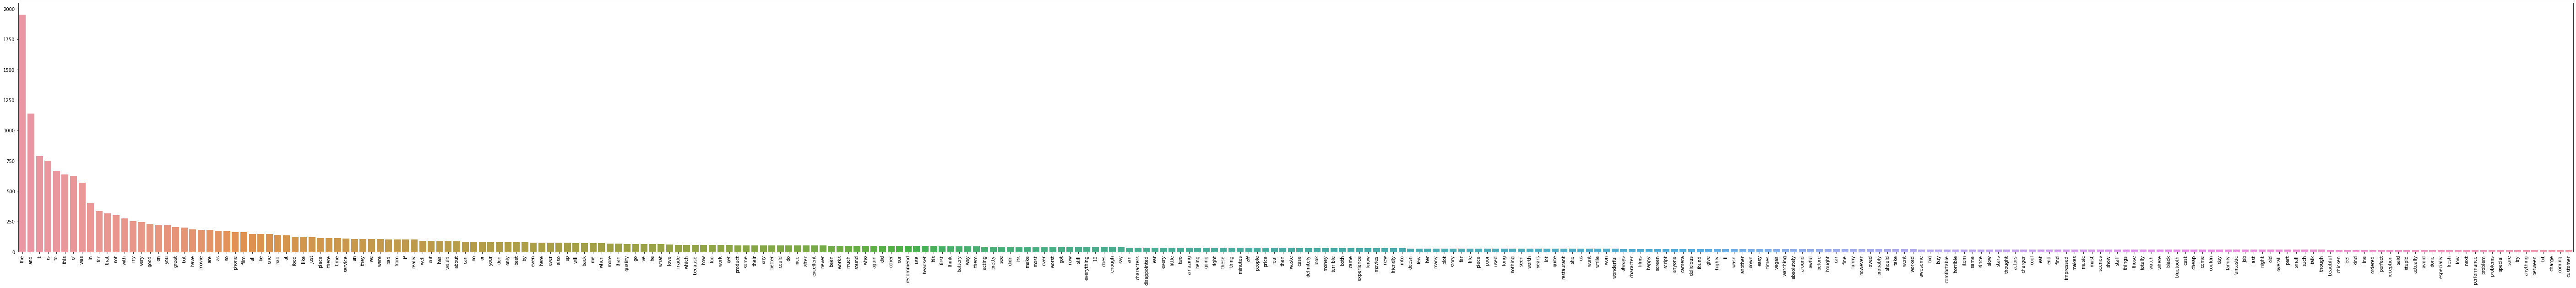

In [101]:
z = zip(term_frequencies, count_vect.get_feature_names())
# then sorted
res = sorted(z, key = lambda x: x[0], reverse=True)
freq, feat = zip(*res)
plt.subplots(figsize=(100, 10))
# turn both of them back to list
freq = list(freq)
feat = list(feat)
# plot
g = sns.barplot(x = feat[:300],y = freq[:300])
g.set_xticklabels(feat[:300], rotation = 90);

/Users/zihuanxu/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/Users/zihuanxu/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



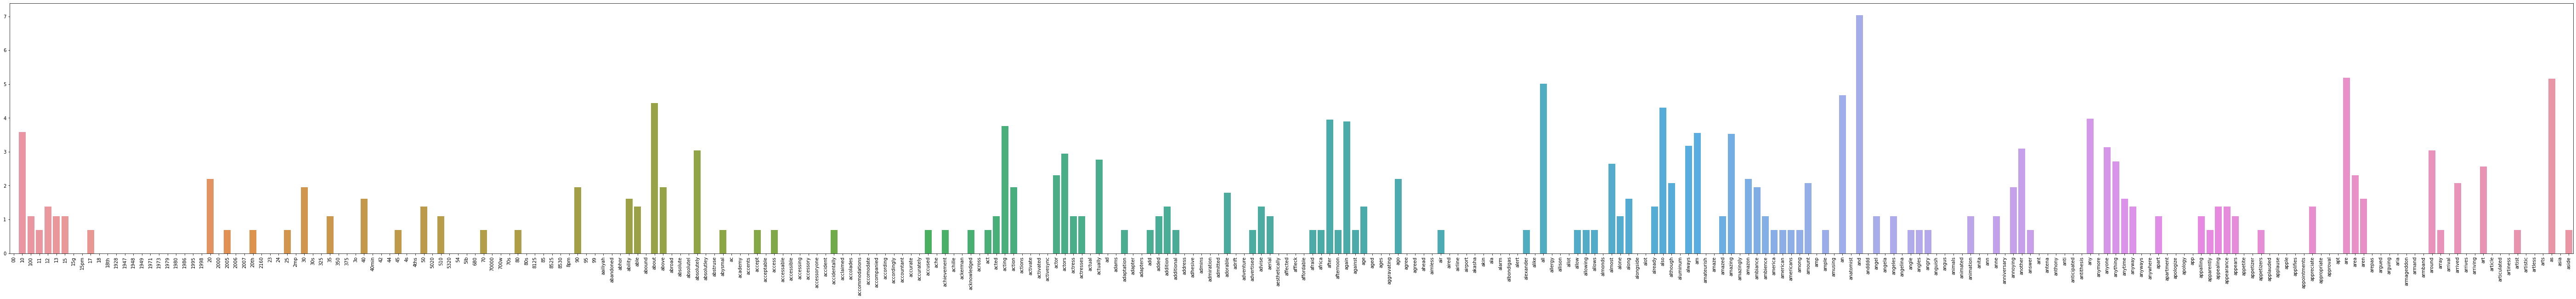

In [102]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [103]:
document_to_transform_1 = []
random_record_1 = df.iloc[50]
random_record_1 = random_record_1['Review']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['Review']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[150]
random_record_3 = random_record_3['Review']
document_to_transform_3.append(random_record_3)
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']
Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


# TF-IDF NB-classifier

In [107]:
tmp_feature = list(count_vect.get_feature_names())
tmp_cnt = []
# set counting list to initial 0
for i in range(len(tmp_feature)):
    tmp_cnt.append(0)
# use three stage for loop to go through all unigrams in all sentence
for i in range(len(df)):
    if list(df[i:i+1]["Score"])[0] == 1:
        for j in list(df[i:i+1]["unigrams"])[0]:
            for k in range(len(tmp_feature)):
                if j == tmp_feature[k]:
                    tmp_cnt[k] += 1
                    break
    else:
        for j in list(df[i:i+1]["unigrams"])[0]:
            for k in range(len(tmp_feature)):
                if j == tmp_feature[k]:
                    tmp_cnt[k] -= 1
                    break
# show first 100 features
print(tmp_feature[0:100])                    
print(tmp_cnt[0:100])

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17', '18', '18th', '1928', '1947', '1948', '1949', '1971', '1973', '1979', '1980', '1986', '1995', '1998', '20', '2000', '2005', '2006', '2007', '20th', '2160', '23', '24', '25', '2mp', '30', '30s', '325', '35', '350', '375', '3o', '40', '40min', '42', '44', '45', '4s', '4ths', '50', '5020', '510', '5320', '54', '5lb', '680', '70', '70000', '700w', '70s', '80', '80s', '8125', '85', '8525', '8530', '8pm', '90', '95', '99', 'aailiyah', 'abandoned', 'abhor', 'ability', 'able', 'abound', 'about', 'above', 'abroad', 'absolute', 'absolutel', 'absolutely', 'absolutley', 'abstruse', 'abysmal', 'ac', 'academy', 'accents', 'accept', 'acceptable', 'access', 'accessable', 'accessible', 'accessing', 'accessory', 'accessoryone', 'accident', 'accidentally', 'acclaimed', 'accolades', 'accommodations']
[0, -1, 1, -1, -2, -1, 1, 0, 0, -1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, -1, -2, 1, 2, 1, 1, 0, -1, 1, 1, 0, 0, -5, -1, 1, -3, 1, -1, -1, -

and 199
great 118
good 93
very 43
is 39
with 38
nice 32
love 32
well 31
works 30


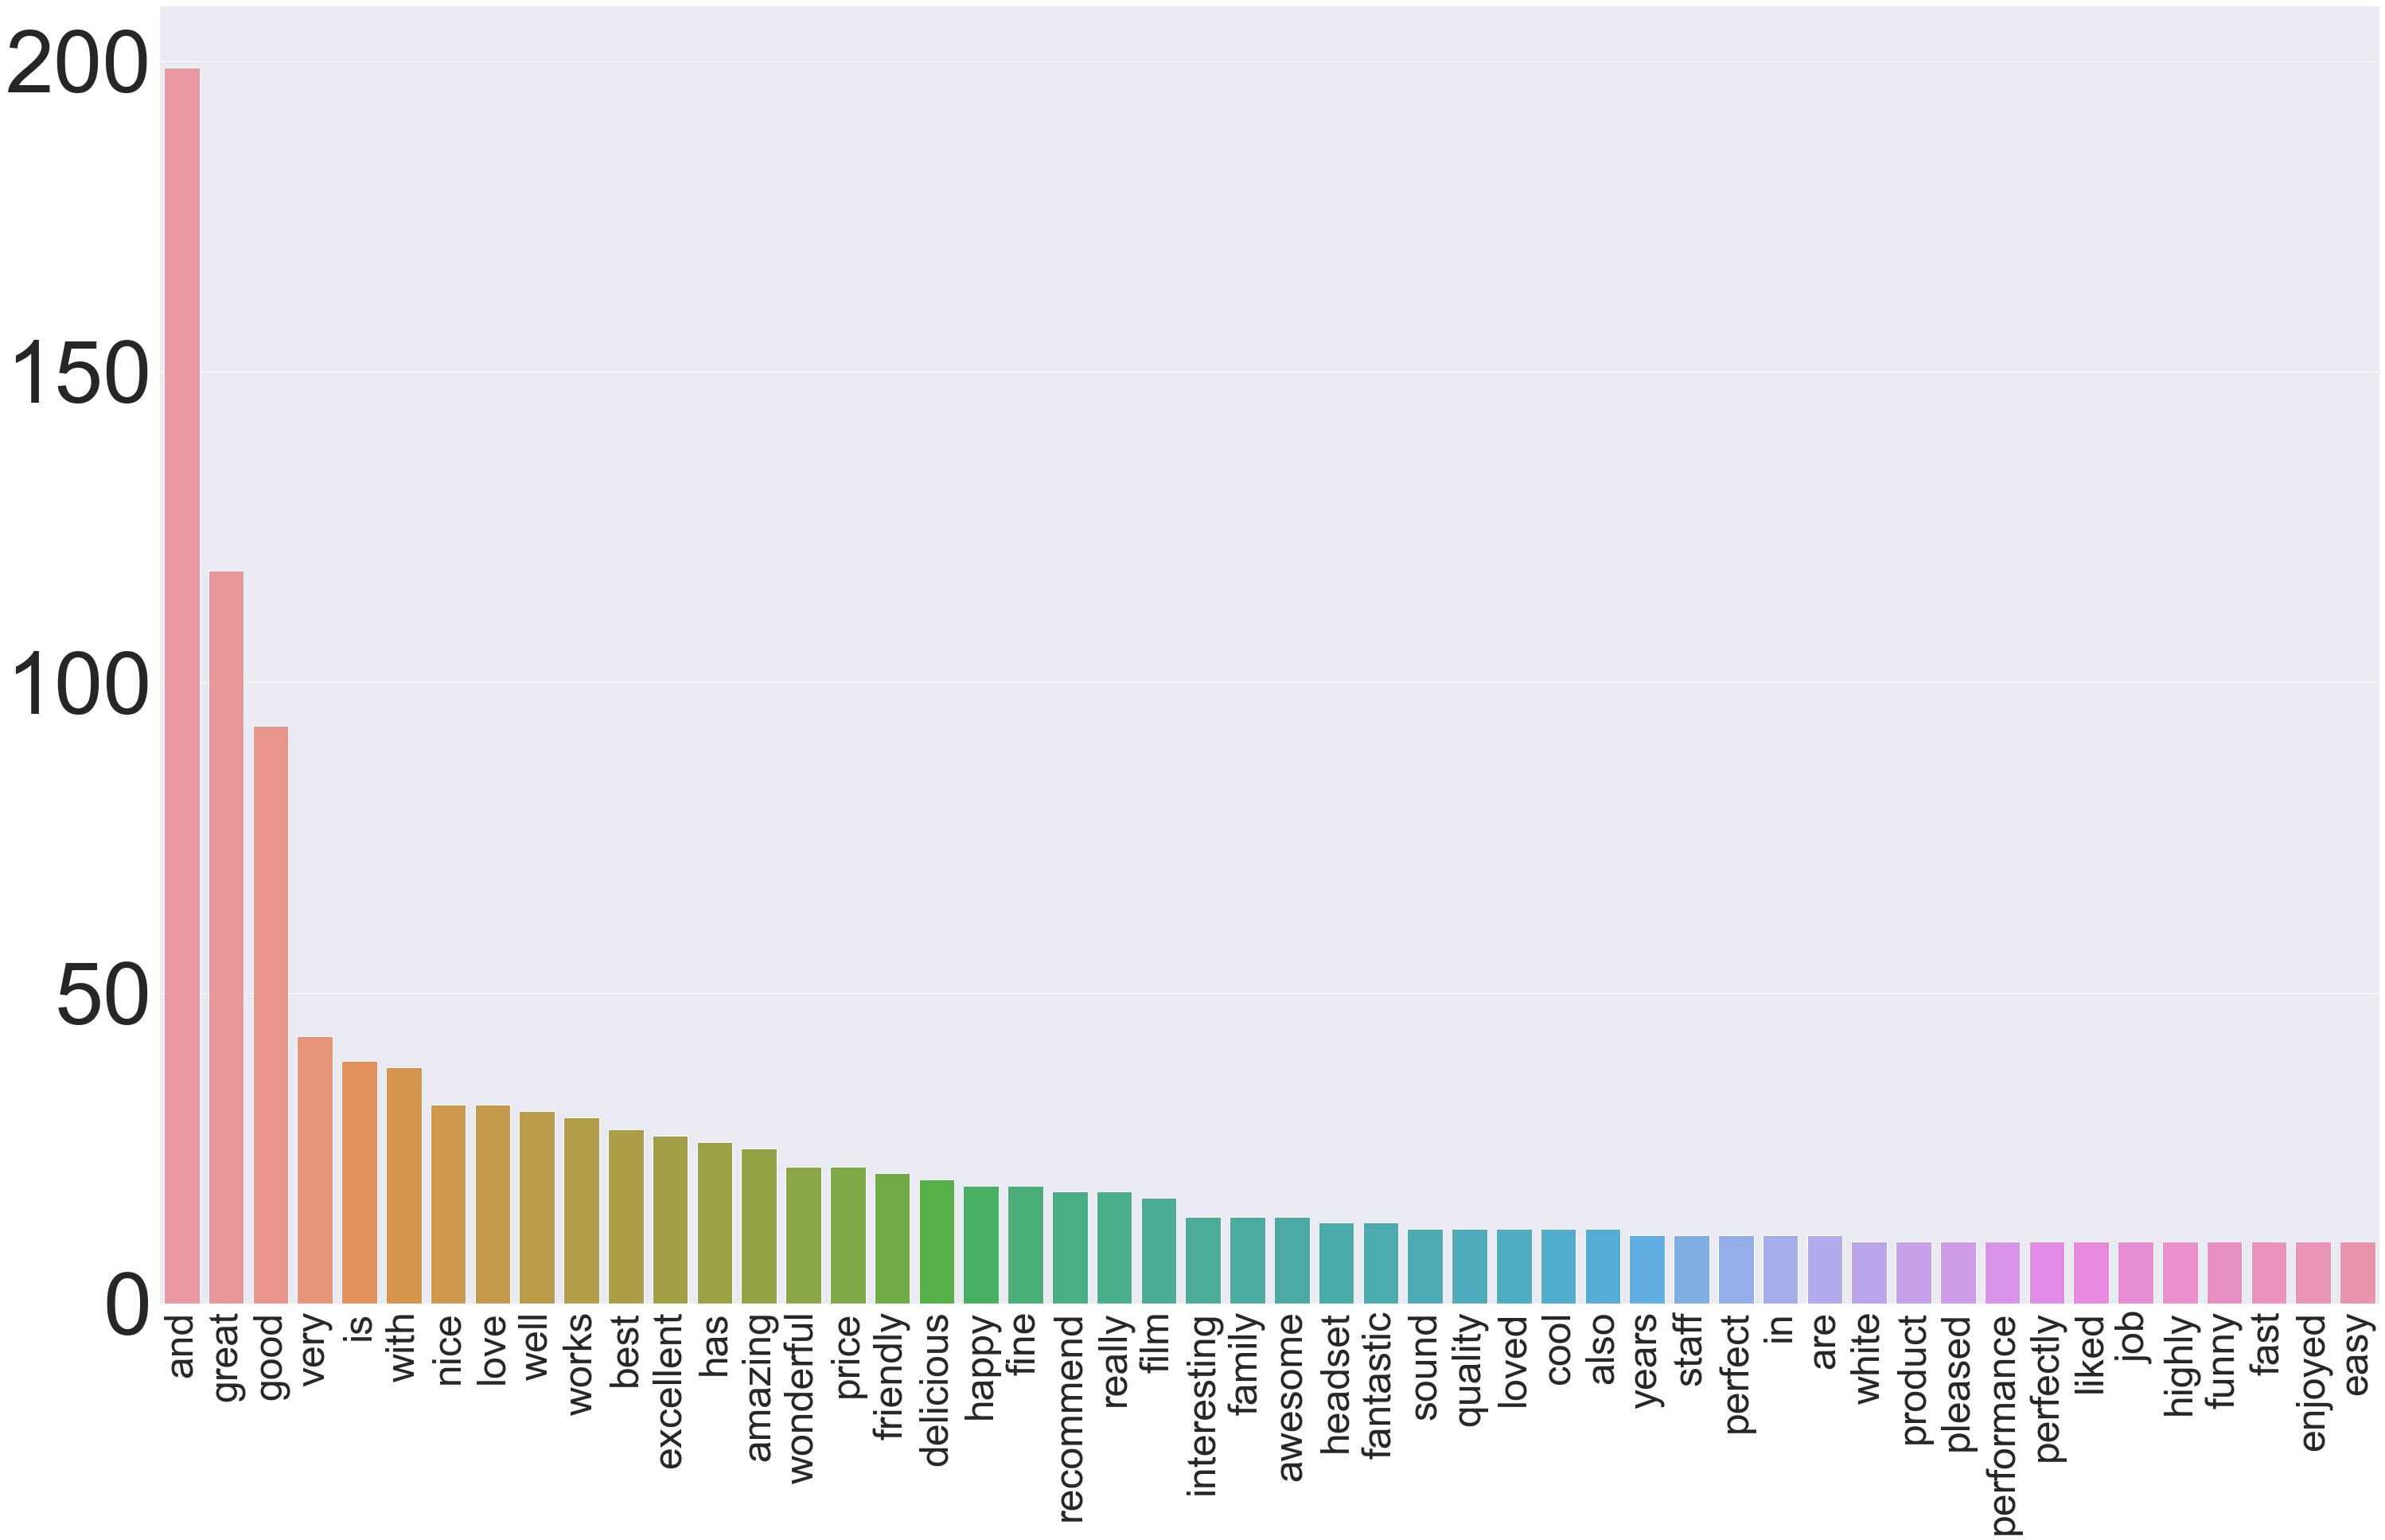

In [109]:

z = zip(tmp_feature, tmp_cnt)
res = sorted(z, key = lambda x: x[1], reverse=True)
tmp_feature, tmp_cnt = zip(*res)
plt.subplots(figsize=(50, 30))
tmp_feature = list(tmp_feature)
tmp_cnt = list(tmp_cnt)
sns.set(font_scale = 10)
g = sns.barplot(x = tmp_feature[:50],y = tmp_cnt[:50])
g.set_xticklabels(tmp_feature[:50], rotation = 90, fontsize = 50);
# top 10 features based on score
for x, y in zip(tmp_feature[0:10], tmp_cnt[0:10]):
    print(x, y)

not -164
was -89
to -89
bad -76
it -63
that -50
of -47
be -38
did -36
no -35


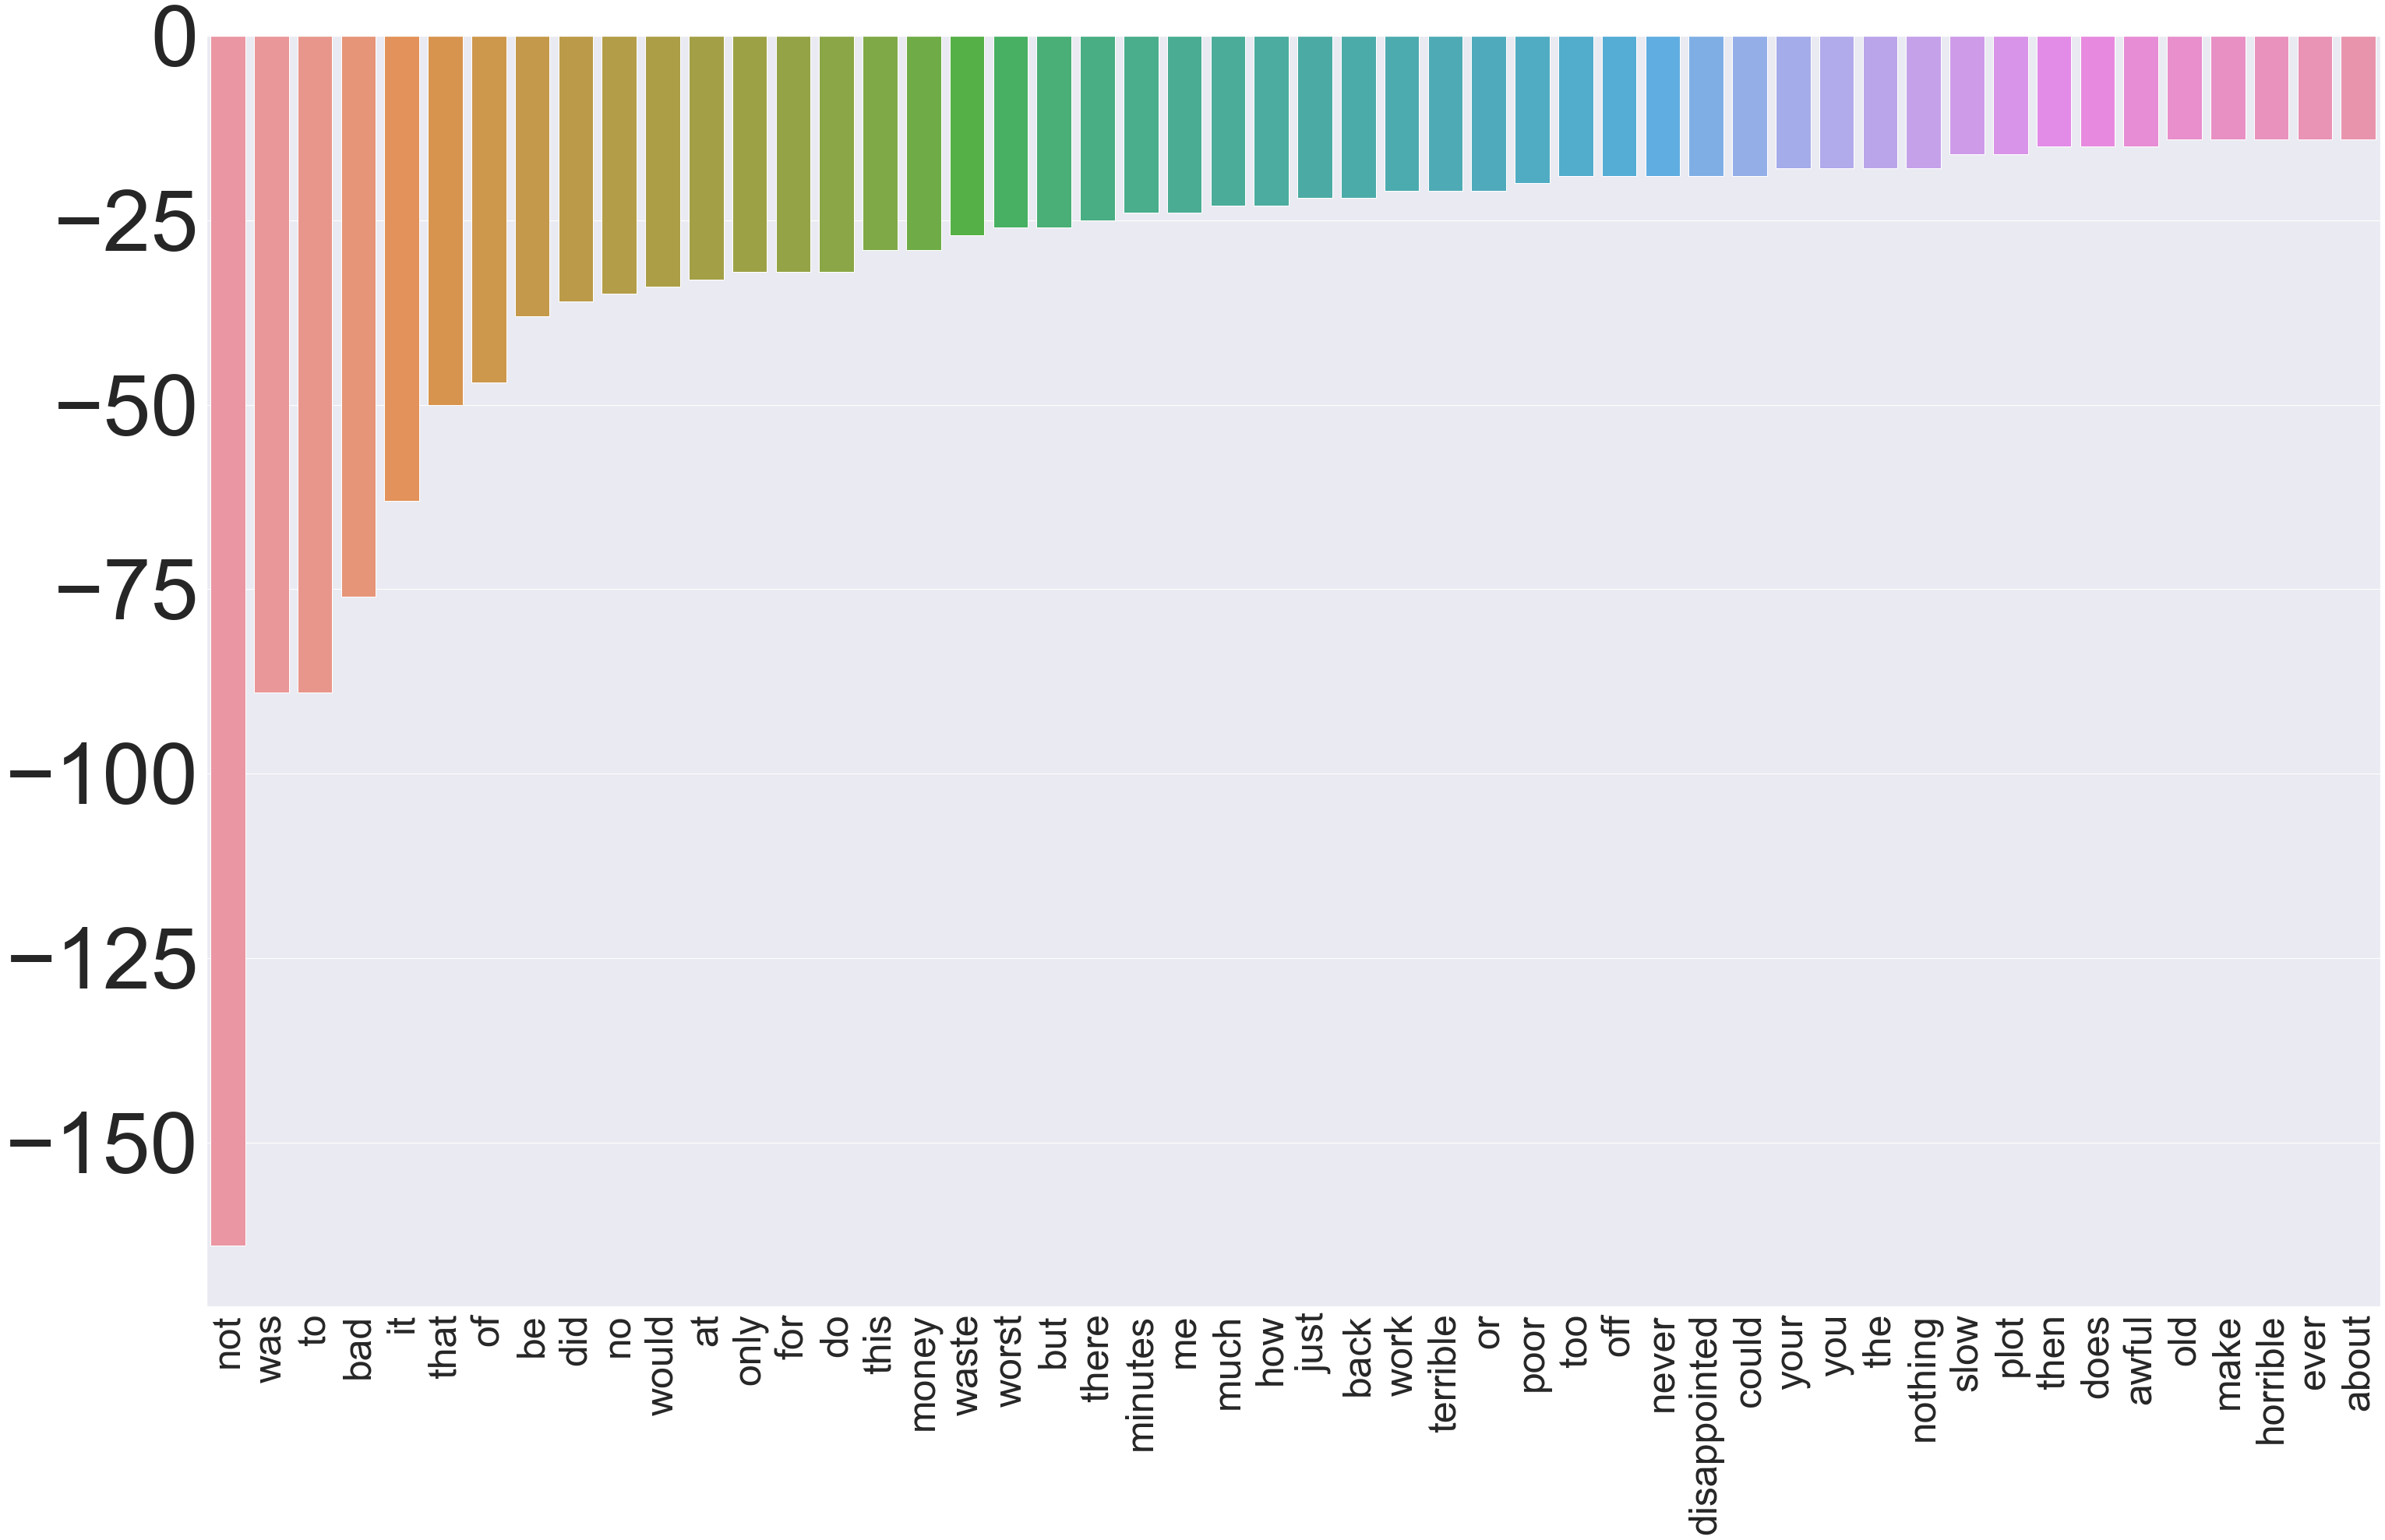

In [110]:
z = zip(tmp_feature, tmp_cnt)
res = sorted(z, key = lambda x: x[1], reverse=False)
tmp_feature, tmp_cnt = zip(*res)
plt.subplots(figsize=(50, 30))
tmp_feature = list(tmp_feature)
tmp_cnt = list(tmp_cnt)
sns.set(font_scale = 10)
g = sns.barplot(x = tmp_feature[:50],y = tmp_cnt[:50])
g.set_xticklabels(tmp_feature[:50], rotation = 90, fontsize = 50);
# top 10 features based on score
for x, y in zip(tmp_feature[0:10], tmp_cnt[0:10]):
    print(x, y)

In [112]:
# tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tdIdf = vectorizer.fit_transform(df.Review)

tfidfList = []
for j in range(0,tdIdf.shape[1]):
    tfidfList.append(sum(tdIdf[:,j].toarray()))
print(tfidfList[:10])

[array([0.33908404]), array([10.75292685]), array([1.20423151]), array([0.70285171]), array([1.26504987]), array([0.8735092]), array([1.16576263]), array([0.2958318]), array([0.03341855]), array([0.64038214])]


In [114]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

# define train set and test set using TF-IDF features
X_train, X_test, Y_train, Y_test = train_test_split(tdIdf, df.Score, test_size=0.25)

# 
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

0.7950219619326501

In [116]:
examples = ['this is good picture.',   #Should be 1
            'food is so bad.',     #Should be 0
            'that was a terrible experience',  #Should be 0
            'so glad to see you again', #Should be 1
            'i feel so sad',  #Should be 0
           ]

doc_term_matrix = vectorizer.transform(examples)
bnb.predict(doc_term_matrix)

array([1, 0, 0, 1, 1])